# Data Science 2 (modeling), BFVM19DATASC2 resit Dec 2, 2021

## Multivariate Component Analysis computer-exam '20-'21 

### Tsjerk A. Wassenaar (WATS), *06-17031440*

#### Instructions

On your workstation desktop you will find all required files:

* This exam `BFVM19DATASC2_H_DataScience2_MCA_WATS.ipynb`

* Data files
  - `dataFrame_all_sims.txt`
  - `dataFrame_all_sims.csv`

In addition, some supplementary reference materials are included:

* Jupyter notebooks `*.ipynb` and `*.html`
* Book chapters and cheat sheets `*.pdf`

Provide your answers in the code cells corresponding with each of the questions below. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment or insert a text-markdown cell with your typeset answer.

All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

Instructions on how to submit your answers are provided at the bottom. All notes, textbooks and other written reference materials are permitted.

## Assignment 1: Factor Analysis

The data file `dataFrame_all_sims.csv` contains measurements on lipids/membranes from simulations of membranes of different compositions to assess the influence of the composition and the effect of ethanol on membrane properties. The data consists of two parts: parameters (explanatory variables) and measured variables (membrane properties). These are described in the accompanying text file.

**Assignment:**

- Read the data in from the file `dataFrame_all_sims.csv`. Remove NA values if present (dropna).

- Perform Factor Analysis. Determine and discuss what variables should be included in the analysis and which should be used for coloring/formatting the plot.

- Interpret the plot and give an interpretation of the factors.

**Assessment:**

- Correct application of FA

- Proper graphical representations

- Assessment and interpretation of factors

- Interpretation of and reflection on results

In [1]:
def varimax(components, gamma=1, maxiter=20, tol=1e-8):
    """Perform VariMax (gamma=1) or OrthoMax (gamma=0) rotation on components"""
    p,k = components.shape
    R   = np.eye(k)
    f   = float(gamma)/p
    d   = 0
    for i in range(maxiter):
        d_old = d
        L = np.dot(components, R)
        A = L**3 - f * (L*(L**2).sum(axis=0))**2
        U,s,V = np.linalg.svd(np.dot(components.T,A))
        R = np.dot(U,V)
        d = sum(s)
        if (d - d_old)**2 < tol: 
            break
    return np.dot(components, R)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data
data = pd.read_csv('dataFrame_all_sims.csv')
data = data.dropna()
data.head()

Y = data.iloc[:, -6:].values
print(data.shape, Y.shape, end='\n\n')

S = np.cov(Y.T)
v = np.diagonal(S)
std = v ** 0.5

print(v, end='\n\n')

# Correlations - Data is heterogenous
R = S / std[:, None] / std[None, :]

labels = data.columns[-6:]

vals, vecs = np.linalg.eigh(R)
vals, vecs = vals[::-1], vecs[:, ::-1]

s = vals.sum()
for i, (v, c) in enumerate(zip(vals, vals.cumsum())):
    print('{} {:7.2%} {:7.2%}'.format(i+1, v / s, c / s))
    
rot = varimax(vecs[:, :2])
projections = ((Y - Y.mean(axis=0)) / std) @ rot

(2690, 14) (2690, 6)

[7.31860291e-03 2.07963555e-01 6.16873775e+02 1.93753109e+03
 5.19254349e-02 4.39719115e+03]

1  84.33%  84.33%
2   8.05%  92.38%
3   5.11%  97.49%
4   1.68%  99.18%
5   0.68%  99.85%
6   0.15% 100.00%


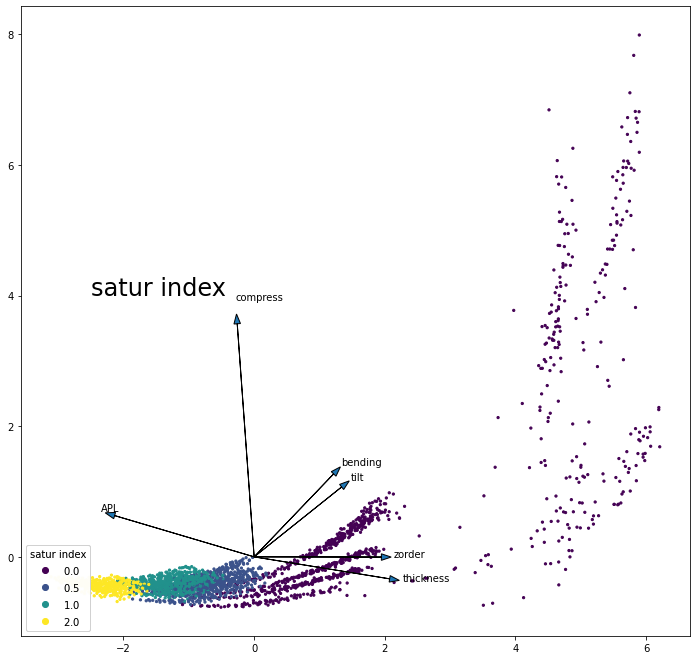

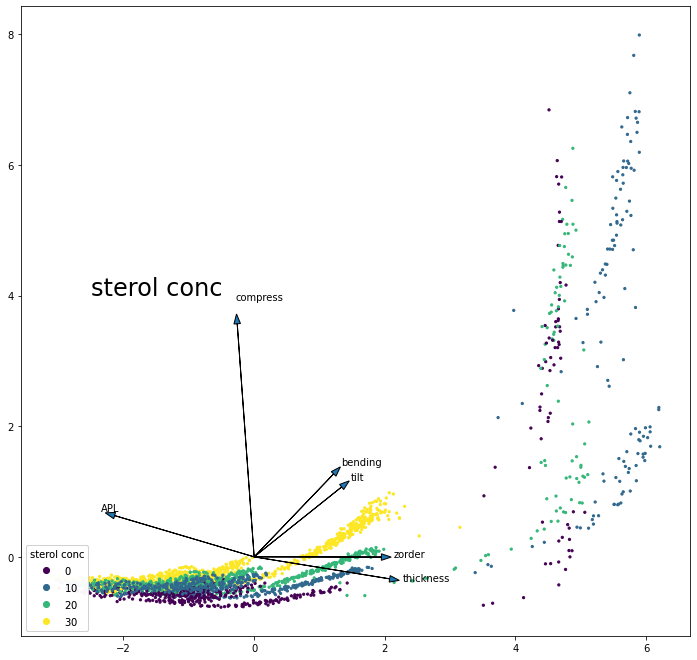

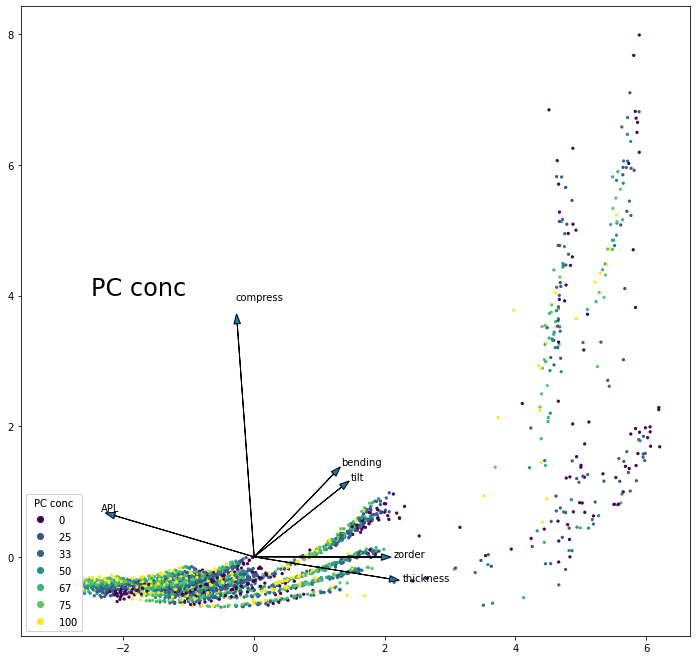

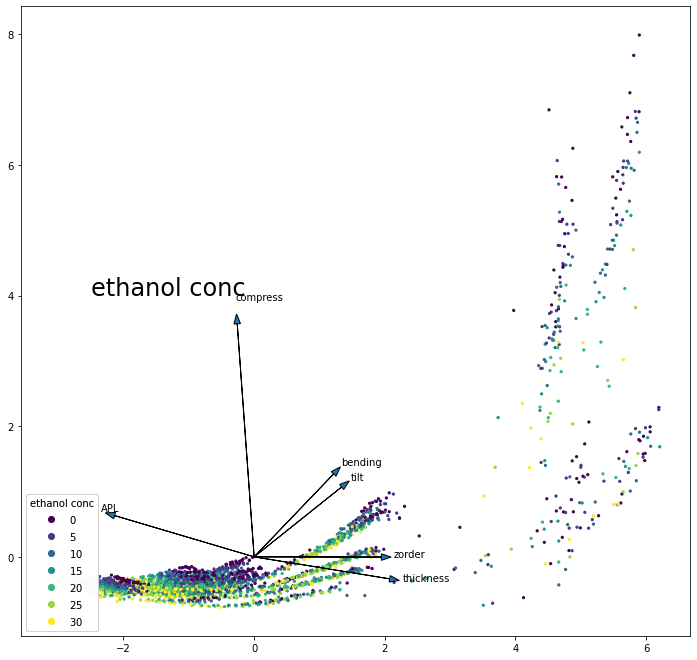

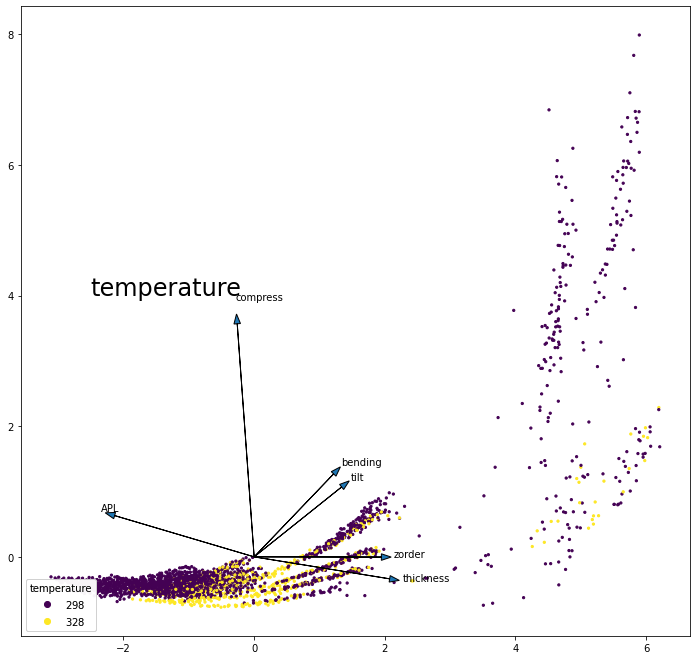

In [5]:
for label in 'satur index', 'sterol conc', 'PC conc', 'ethanol conc', 'temperature':
    fig, ax = plt.subplots(figsize=(12,12))
    # This is required for plotting projections
    ax.set_aspect('equal')
    scatter = plt.scatter(*projections[:, [0, 1]].T, c=data[label], s=5, label=label)
    for (x, y), lbl in zip(4 * rot[:, [0, 1]], data.columns[-6:]):
        plt.text(1.1*x, 1.1*y, lbl)
        plt.arrow(0, 0, x, y, head_width=0.1)
    plt.text(-2.5, 4, label, fontsize=24)
    legend1 = ax.legend(*scatter.legend_elements(), loc='lower left', title=label)
    ax.add_artist(legend1)

    plt.show()

## Assignment 2: Multivariate Linear Regression.

Use the data from the same data file (`dataFrame_all_sims.csv`).

Assignment:

- Perform multivariate linear regression to construct a model for predicting the area per lipid (APL) from the given parameters.

- Plot the _estimated_ area per lipid against the _actual_ area per lipid. 

- Reflect on the quality of the regression model and the possibility to predict the APL from the coordinates using regression.

Assessment:

- Correct application of MLR
- Proper graphical representations
- Assessment and interpretation of regression
- Interpretation of and reflection on results

## Assignment 3: Linear Discriminant Analysis

Use the data from the same data file (`dataFrame_all_sims.csv`).

Assignment:

- Perform discriminant analysis to investigate the difference between membranes with cholesterol and with ergosterol.

- Plot the projections of the data on the discriminant axis in a meaningful manner. 

- Reflect on the quality of the discriminant model and how well the two sterol types can be differentiated.

Assessment:

- Correct application of DA
- Proper graphical representations
- Interpretation of and reflection on results

***

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and submit your work using a command like `submit_your_work 123456 JohnDoe_123456.ipynb` (enter `submit_your_work --help` to get help on submit script usage).
</li><li>
After getting clearance from the person monitoring the exam, you are free to leave.
</li></ol>
</div>

#### Success!